In [5]:
import pandas as pd
from pandas import option_context

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import List, Tuple, Dict, Union, Optional
import random
import glob
random.seed(0)
import re
import json

pd.set_option('max_colwidth', 400) # avoid trimming cells
pd.set_option('display.max_columns', None) # avoid truncating columns
pd.set_option('display.max_rows', None) # avoid truncating rows

In [6]:
dict_line = re.compile(r'^\{\'eval.*\}$')

def fetch_log_files(verbose=False):
    log_files = list(Path(f'resources/models/').glob(f'seed_*/ft/*-val_exp/finetune.log'))

    if verbose:
        for i in log_files:
            print(str(i))
                  
    return log_files

def parse_filepath(fp: Path) -> Tuple:
    """
    extracts model and seed from a filepath such as 'resources/models/seed_1/ft/bart_small-SI_t5/finetune.log'
    """
    parts = fp.parts
    print(parts)
    try:
        model_parts = parts[4].split('-')
        if len(model_parts) == 2:
            model = model_parts[0]
        else:
            model = model_parts[1]
        seed = int(parts[2].split('_')[-1])
    except:
        print(f'Failed to parse model and seed from {fp}')
        model, seed = None, None
    return model, seed
    
def read_eval_results_from_finetune_log(file: Path) -> Dict:
    eval_results = []
    with open(str(file), 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if re.match(dict_line, line):
                line_dict = eval(line) # str -> dict
                if not line_dict.get('epoch'): # very first eval result is before training started!
                    line_dict['epoch'] = 0.0
                eval_results.append(line_dict)
        
    return eval_results
    
def load_validation_results(files: List[Path]) -> pd.DataFrame:
    """
    expects a list of files, e.g. resources/models/seed_1/ft/bart_small-SI_t5/finetune.log
    """
    dfs = []
    for file in files:
        eval_results = read_eval_results_from_finetune_log(file)
        # print(eval_results)
        df = pd.DataFrame(eval_results)
        df['model'], df['seed'] = parse_filepath(file)
        df = df.set_index(['model', 'seed', 'epoch'])
        dfs.append(df)
    
    df = pd.concat(dfs, axis=0)
    df = df.rename(columns={'eval_self_bleu_t': 'eval_self_bleu'})

    # sanity check to make sure reference-based eval on source differs to target
    assert not all(df['eval_rouge1_s'] == df['eval_rouge1_t'])
    
    return df

log_files = fetch_log_files(verbose=True)
# print(log_files)
df = load_validation_results(log_files)
print(f'Dataframe has {len(df)} entries and {len(df.columns)} metrics: {df.columns}')

# df.head(10)
df

resources/models/seed_23/ft/bart_base-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-SI_bart-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-MLM_PS-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-PS-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-SI_mass-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-SI_t5-val_exp/finetune.log
resources/models/seed_23/ft/t5_small-val_exp/finetune.log
resources/models/seed_23/ft/bart_small-MLM-val_exp/finetune.log
('resources', 'models', 'seed_23', 'ft', 'bart_base-val_exp', 'finetune.log')
('resources', 'models', 'seed_23', 'ft', 'bart_small-SI_bart-val_exp', 'finetune.log')
('resources', 'models', 'seed_23', 'ft', 'bart_small-MLM_PS-val_exp', 'finetune.log')
('resources', 'models', 'seed_23', 'ft', 'bart_small-PS-val_exp', 'finetune.log')
('resources', 'models', 'seed_23', 'ft', 'bart_small-SI_mass-val_exp', 'finetune.log')
('resources', 'models', 'seed_23', 'ft', 'bart_small-SI_t5-val_exp'

eval_loss  eval_uniq  eval_qc_turn_level  \
model     seed epoch                                             
bart_base 23   0.00    4.736749     0.9999              0.2269   
               0.25    2.685289     0.8554              0.0821   
               0.50    2.602353     0.8662              0.1092   
               0.75    2.557133     0.8431              0.2038   
               1.00    2.531736     0.8769              0.1407   
               1.25    2.517341     0.8738              0.2139   
               1.50    2.496112     0.8786              0.2329   
               1.75    2.478581     0.8742              0.1497   
               2.00    2.457650     0.8875              0.1802   
               2.25    2.466572     0.8869              0.2108   
               2.50    2.461544     0.8727              0.1571   
               2.75    2.443665     0.8738              0.1598   
               3.00    2.440016     0.8914              0.1436   
               3.25    2.455979     0.8921              0.1438   
               3.50    2.454156     0.8868              0.1604   
               3.75    2.434206     0.8985              0.1638   
               4.00    2.434174     0.8954              0.1641   
               4.25    2.451117     0.8994              0.1774   
               4.50    2.452443     0.8944              0.1497   
               4.75    2.442974     0.9218              0.1390   
               5.00    2.436397     0.8945              0.1776   
               5.25    2.480321     0.8844              0.1707   
               5.50    2.465797     0.9064              0.1882   
               5.75    2.460390     0.9063              0.1448   
               6.00    2.451289     0.9173              0.1679   
               6.25    2.484169     0.9130              0.1821   
               6.50    2.490648     0.9248              0.1732   
               6.75    2.471610     0.9173              0.1668   
               7.00    2.471333     0.9178              0.1864   
               7.25    2.509213     0.9159              0.1830   
               7.50    2.506998     0.9145              0.1695   
               7.75    2.498333     0.9144              0.1511   
               8.00    2.499657     0.9234              0.1688   
               8.25    2.526862     0.9194              0.1868   
               8.50    2.520826     0.9222              0.1747   
               8.75    2.511490     0.9267              0.1575   
               9.00    2.514767     0.9273              0.1763   
               9.25    2.534001     0.9293              0.1623   
               9.50    2.527391     0.9250              0.1710   
               9.75    2.528567     0.9238              0.1730   
               10.00   2.528888     0.9245              0.1660   
SI_bart   23   0.00   10.380102     0.9994              0.0579   
               0.25    3.716496     0.4233              0.0127   
               0.50    3.597327     0.4993              0.0148   
               0.75    3.533958     0.4712              0.0421   
               1.00    3.490841     0.4733              0.0691   
               1.25    3.461871     0.5542              0.0332   
               1.50    3.426533     0.5387              0.0231   
               1.75    3.400657     0.5441              0.0408   
               2.00    3.382536     0.5927              0.0631   
               2.25    3.357111     0.6210              0.0262   
               2.50    3.344990     0.5909              0.0322   
               2.75    3.330518     0.5882              0.0384   
               3.00    3.322953     0.6485              0.0216   
               3.25    3.308919     0.6008              0.0310   
               3.50    3.299307     0.6237              0.0344   
               3.75    3.294826     0.5938              0.0238   
               4.00    3.279235     0.6314              0.0402   
               4.25    3.275316     0.6240              0.0470

Plotting 36 metrics: Index(['eval_loss', 'eval_uniq', 'eval_qc_turn_level', 'eval_qc_sent_level',
       'eval_ppl_mean', 'eval_ppl_std', 'eval_intra_dist1', 'eval_intra_dist2',
       'eval_inter_dist1', 'eval_inter_dist2', 'eval_self_bleu', 'eval_bleu_t',
       'eval_rouge1_t', 'eval_rouge2_t', 'eval_rougeL_t', 'eval_meteor_t',
       'eval_exact_t', 'eval_novelty_t_1gram', 'eval_novelty_t_2gram',
       'eval_novelty_t_3gram', 'eval_novelty_t_4gram', 'eval_bleu_s',
       'eval_rouge1_s', 'eval_rouge2_s', 'eval_rougeL_s', 'eval_meteor_s',
       'eval_exact_s', 'eval_novelty_s_1gram', 'eval_novelty_s_2gram',
       'eval_novelty_s_3gram', 'eval_novelty_s_4gram', 'eval_gen_len',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'eval_samples'],
      dtype='object')
[['eval_loss' 'eval_uniq' 'eval_qc_turn_level' 'eval_qc_sent_level']
 ['eval_ppl_mean' 'eval_ppl_std' 'eval_intra_dist1' 'eval_intra_dist2']
 ['eval_inter_dist1' 'eval_inter_dist2' 'eval_s

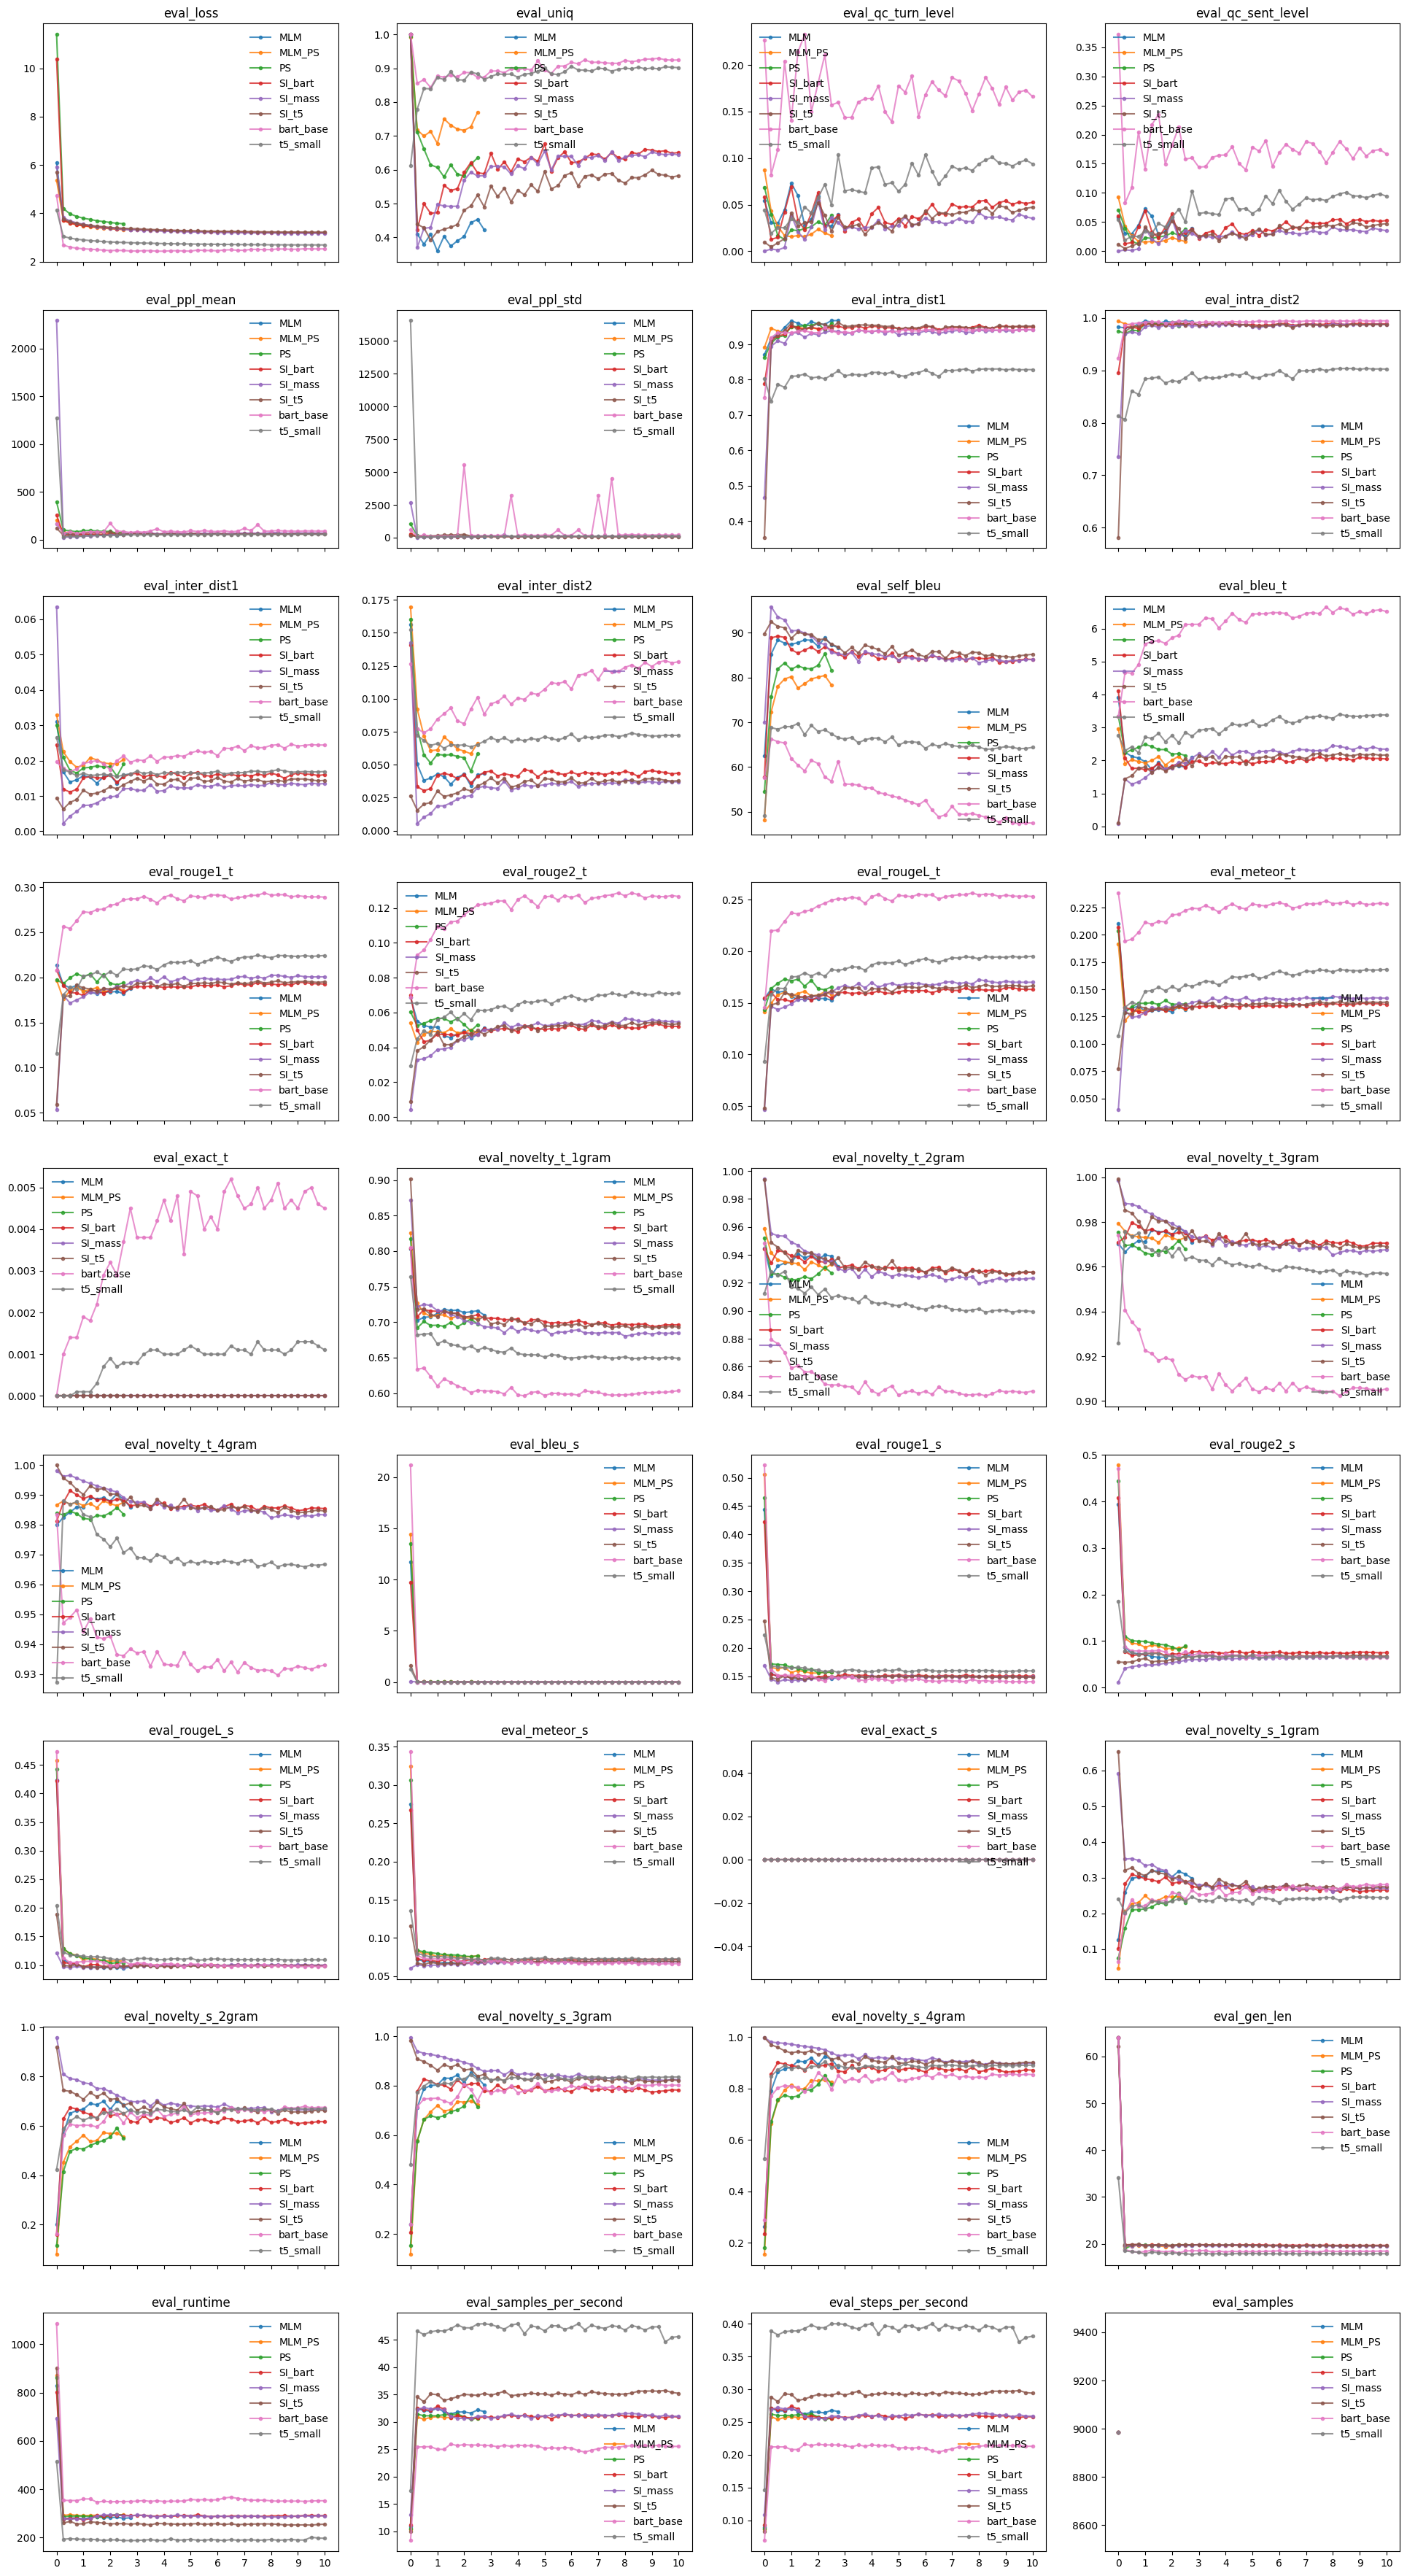

In [12]:
def get_col_count(lst, cols=3):
    """
    given a lst, infer the maximum number of columns
    """
    if len(lst) < cols:
        return len(lst)
    else:
        return cols
    
def get_row_count(lst, cols=3):
    """
    given a predetermined number of columns, derive the number of rows to matricise the list
    """        
    nrows = math.ceil(len(lst) / cols)
    return nrows

def build_fig(lst, ncols):
    # ncols = get_col_count(lst, cols=ncols)
    nrows = get_row_count(lst, cols=ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 5*nrows), squeeze=0, sharex=True) # squeeze will always return a 2d array!
    return fig, axes

def plot_data(df, metrics=['eval_loss'], max_cols=4, verbose=False, save_as=None):
    if verbose:
        print(f'Plotting {len(metrics)} metrics: {metrics}')
    ncols = get_col_count(metrics, max_cols)
    fig, axes = build_fig(metrics, ncols)
    # print(axes.shape, axes.size, axes.ndim)
    nrows, ncols = axes.shape
    metrics = np.array(metrics).reshape(nrows, ncols)
    
    for i in range(nrows):
        for j in range(ncols):
            # get the relevant metric
            metric = metrics[i][j]
            for model, dfg in df.groupby(['model']):
                x_vals = dfg.index.get_level_values('epoch').values
                y_vals = dfg[metric].values
                if verbose:
                    print(f'plotting metric {metric} for {model} on row {i}, col {j}')
                    
                axes[i][j].errorbar(
                        x_vals, 
                        y_vals,
                        label=model,
                        marker='.',
                        alpha=0.8,
                        linestyle='-',
                        # fmt='-o'
                    )

                axes[i][j].set_title(f'{metric}')
                axes[i][j].set_xticks(x_vals[::4])
                axes[i][j].legend(frameon=False)
                
    if save_as is not None:
        Path(save_as).parent.mkdir(exist_ok=True, parents=True)
        plt.savefig(save_as)
        print(f'saved figure to {save_as}')
        
    return

# plot_data(df, metrics=df.columns, verbose=True, save_as='plots/val_exp_all_metrics.png')

123
Plotting 6 metrics: ['eval_ppl_mean', 'eval_inter_dist1', 'eval_intra_dist1', 'eval_rouge1_s', 'eval_novelty_s_1gram', 'eval_novelty_s_2gram']
[['eval_ppl_mean' 'eval_inter_dist1' 'eval_intra_dist1' 'eval_rouge1_s'
  'eval_novelty_s_1gram' 'eval_novelty_s_2gram']]
plotting metric eval_ppl_mean for SI_bart on row 0, col 0
plotting metric eval_ppl_mean for SI_mass on row 0, col 0
plotting metric eval_ppl_mean for SI_t5 on row 0, col 0
plotting metric eval_inter_dist1 for SI_bart on row 0, col 1
plotting metric eval_inter_dist1 for SI_mass on row 0, col 1
plotting metric eval_inter_dist1 for SI_t5 on row 0, col 1
plotting metric eval_intra_dist1 for SI_bart on row 0, col 2
plotting metric eval_intra_dist1 for SI_mass on row 0, col 2
plotting metric eval_intra_dist1 for SI_t5 on row 0, col 2
plotting metric eval_rouge1_s for SI_bart on row 0, col 3
plotting metric eval_rouge1_s for SI_mass on row 0, col 3
plotting metric eval_rouge1_s for SI_t5 on row 0, col 3
plotting metric eval_nove

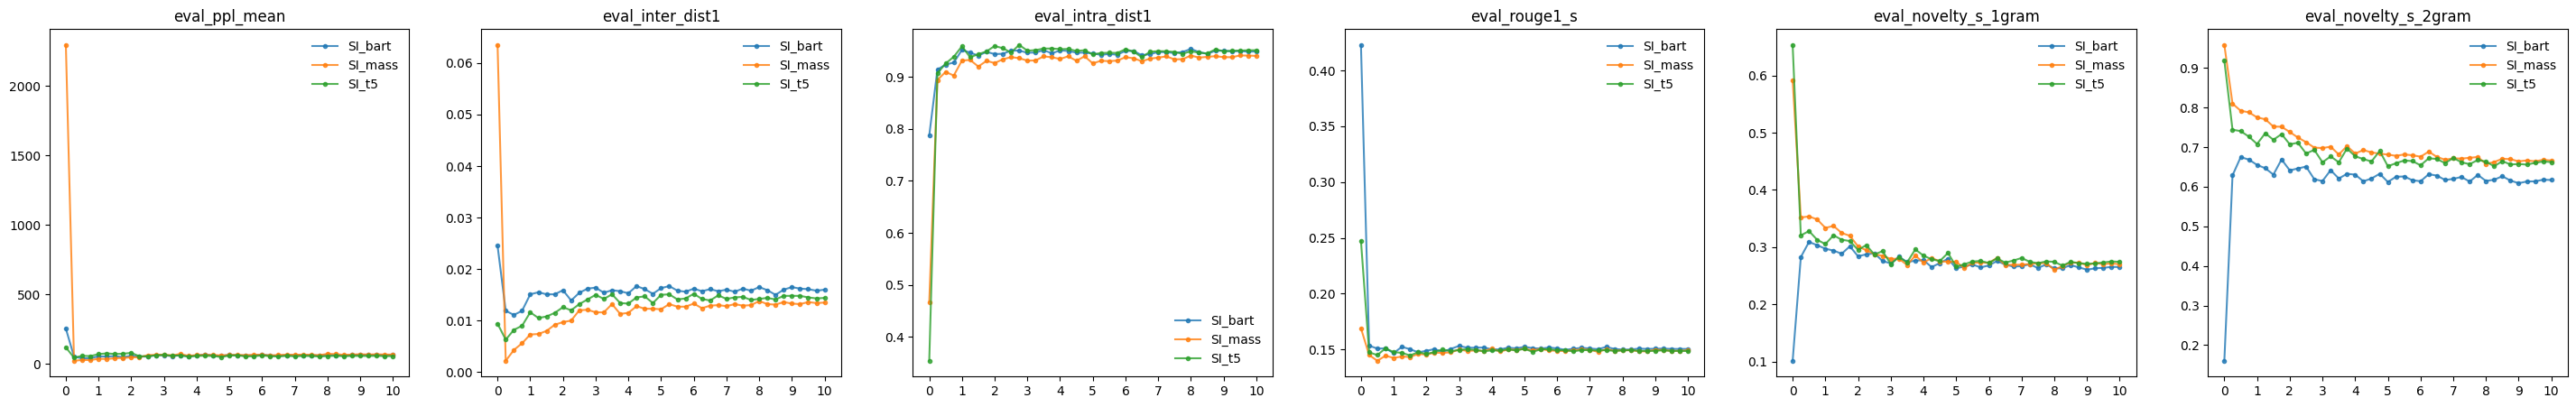

In [30]:
dfs = df.iloc[df.index.get_level_values(0).str.contains('SI')]
print(len(dfs))
metrics=['eval_ppl_mean', 'eval_inter_dist1', 'eval_intra_dist1', 'eval_rouge1_s', 'eval_novelty_s_1gram', 'eval_novelty_s_2gram']
plot_data(dfs, metrics=metrics, max_cols=len(metrics), verbose=True, save_as=None)

82
Plotting 4 metrics: ['eval_ppl_mean', 'eval_rouge1_s', 'eval_novelty_s_1gram', 'eval_novelty_s_2gram']
[['eval_ppl_mean' 'eval_rouge1_s' 'eval_novelty_s_1gram'
  'eval_novelty_s_2gram']]
plotting metric eval_ppl_mean for bart_base on row 0, col 0
plotting metric eval_ppl_mean for t5_small on row 0, col 0
plotting metric eval_rouge1_s for bart_base on row 0, col 1
plotting metric eval_rouge1_s for t5_small on row 0, col 1
plotting metric eval_novelty_s_1gram for bart_base on row 0, col 2
plotting metric eval_novelty_s_1gram for t5_small on row 0, col 2
plotting metric eval_novelty_s_2gram for bart_base on row 0, col 3
plotting metric eval_novelty_s_2gram for t5_small on row 0, col 3


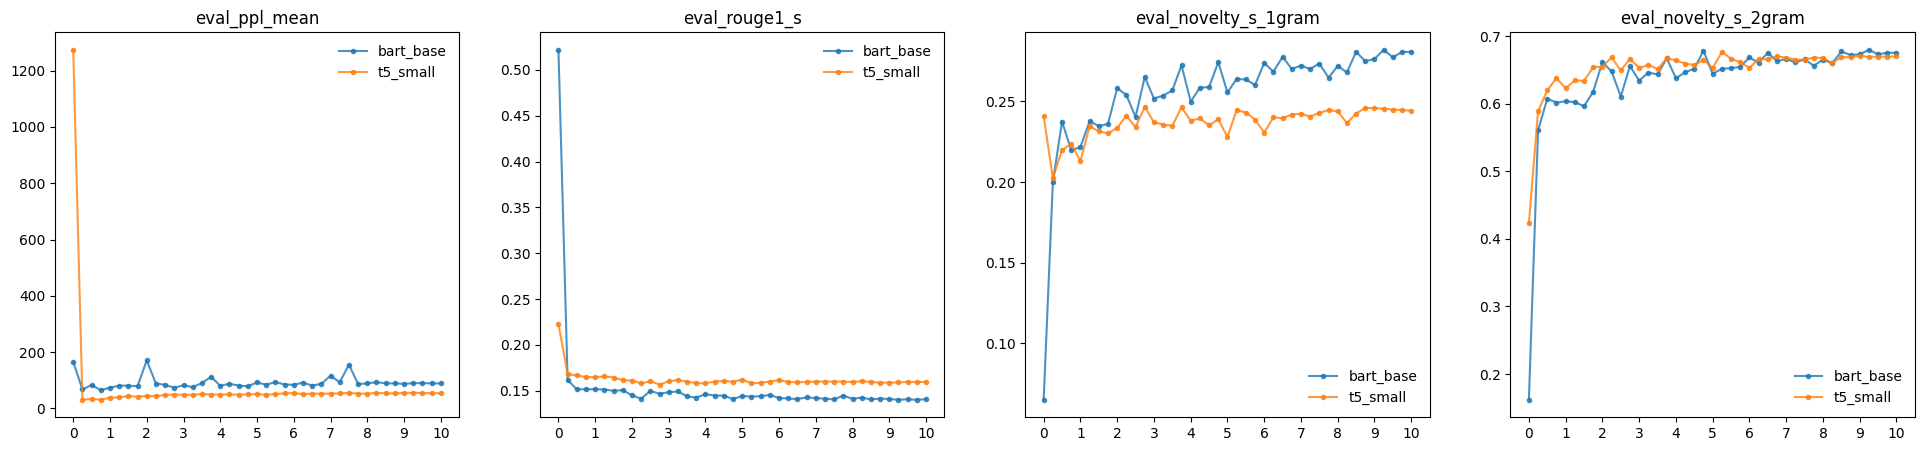

In [23]:
dfs = df.iloc[(df.index.get_level_values(0) == 'bart_base') | (df.index.get_level_values(0) == 't5_small')]
print(len(dfs))
metrics=['eval_ppl_mean', 'eval_inter_dist_1', 'eval_intra_dist_1', 'eval_rouge1_s', 'eval_novelty_s_1gram', 'eval_novelty_s_2gram']
plot_data(dfs, metrics=metrics, max_cols=len(metrics), verbose=True, save_as=None)

Plotting 1 metrics: ['eval_rouge1_s']
[['eval_rouge1_s']]
plotting metric eval_rouge1_s for SI_bart on row 0, col 0
plotting metric eval_rouge1_s for SI_mass on row 0, col 0
plotting metric eval_rouge1_s for SI_t5 on row 0, col 0
plotting metric eval_rouge1_s for bart_base on row 0, col 0
plotting metric eval_rouge1_s for t5_small on row 0, col 0


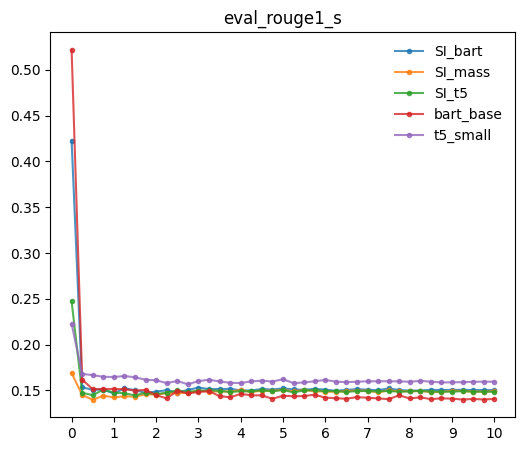

In [4]:
plot_data(df, metrics=['eval_rouge1_s'], verbose=True)